## Initialization

In [45]:
import keras
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Mnist data loading

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 29s 3us/step


In [10]:
X_train.max()

255

In [11]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [12]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

(60000, 784)
(10000, 784)


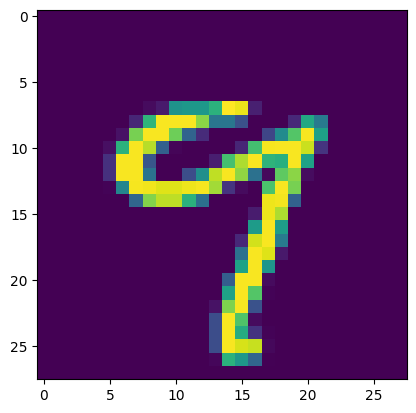

In [18]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)
plt.imshow(X_train[154].reshape(28, 28))

## Build a simple autoencoder

In [40]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(144, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
decoder_layer = autoencoder.layers[-1]
encoded_input = keras.Input(shape=(144,))
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='binary_crossentropy')
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2097 - binary_crossentropy: 0.2097 - val_loss: 0.1316 - val_binary_crossentropy: 0.1316
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1138 - binary_crossentropy: 0.1138 - val_loss: 0.0988 - val_binary_crossentropy: 0.0988
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0928 - binary_crossentropy: 0.0928 - val_loss: 0.0860 - val_binary_crossentropy: 0.0860
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0833 - binary_crossentropy: 0.0833 - val_loss: 0.0793 - val_binary_crossentropy: 0.0793
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0780 - binary_crossentropy: 0.0780 - val_loss: 0.0754 - val_binary_crossentropy: 0.0754
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0747 - binary_crossentropy: 0.0747 - val_loss: 0.0730 - val_binary_crossentropy: 0.0730
Epoch 7/50
235/

## Visualization

313/313 [==============================] - 0s 1ms/step


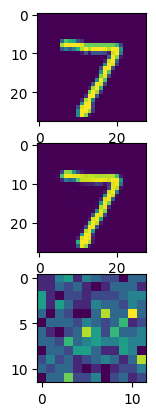

In [38]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
plt.subplot(311)
plt.imshow(X_test[0].reshape(28, 28))
plt.subplot(312)
plt.imshow(decoded_imgs[0].reshape(28, 28))
plt.subplot(313)
plt.imshow(np.uint(encoded_imgs[0].reshape(12, 12)))


## Classification

In [43]:
x_train_encoded, x_test_encoded = encoder(X_train), encoder(X_test)
print(x_train_encoded.shape)
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(x_train_encoded, tf.keras.utils.to_categorical(y_train),
          validation_data=(x_test_encoded, tf.keras.utils.to_categorical(y_test)),
          epochs=100,
          batch_size=32)

(60000, 144)
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.7944 - val_loss: 0.0802 - val_accuracy: 0.8842
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.8901 - val_loss: 0.0631 - val_accuracy: 0.9075
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9081 - val_loss: 0.0550 - val_accuracy: 0.9179
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9194 - val_loss: 0.0503 - val_accuracy: 0.9259
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9270 - val_loss: 0.0459 - val_accuracy: 0.9333
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9333 - val_loss: 0.0442 - val_accuracy: 0.9355
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9387 - val_loss: 0.

## Evaluation of the model

In [44]:
y_pre_te = model.predict(x_test_encoded)
print(confusion_matrix(np.argmax(y_pre_te, axis=1), y_test))
print(classification_report(np.argmax(y_pre_te, axis=1), y_test))

313/313 [==============================] - 1s 2ms/step
[[ 958    0    6    0    3   10    9    1    6    5]
 [   0 1119    4    0    3    2    4    4    1    6]
 [   1    1  977    8    3    1    3   14   12    2]
 [   2    4   13  975    2   15    0    5   29    8]
 [   3    0    4    0  934    1    4    4    6   17]
 [   3    0    1    9    1  833    5    3    7    5]
 [   5    5    3    1    6   10  931    0    3    0]
 [   4    2   12    5    4    4    0  980    6    7]
 [   3    4   12    6    2    7    1    2  895    9]
 [   1    0    0    6   24    9    1   15    9  950]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       998
           1       0.99      0.98      0.98      1143
           2       0.95      0.96      0.95      1022
           3       0.97      0.93      0.95      1053
           4       0.95      0.96      0.96       973
           5       0.93      0.96      0.95       867
           6       0.97      0.97  

## Brest Cancer Prediction With Auto Encoders

## Data loading

In [46]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler().fit(X_train)
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [48]:
X_train.shape

(398, 30)

In [51]:
input_m = keras.Input(shape=(30,))
encoded = keras.layers.Dense(2, activation='sigmoid')(input_m)
decoded = keras.layers.Dense(30, activation='linear')(encoded)
autoencoder = keras.Model(input_m, decoded)
encoder = keras.Model(input_m, encoded)
decoder_layer = autoencoder.layers[-1]
encoded_input = keras.Input(shape=(2,))
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [52]:
autoencoder.compile(optimizer='adam', loss='mse', metrics='mse')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=5, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.1004 - mse: 0.1004 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0226 - m

In [53]:
encoded_x_test = encoder(X_test)
encoded_x_train = encoder(X_train)

In [54]:
classifier = keras.models.Sequential()
classifier.add(keras.layers.Dense(5, activation = 'relu'))
classifier.add(keras.layers.Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
classifier.fit(encoded_x_train, y_train, validation_data = (encoded_x_test, y_test), epochs = 100, batch_size = 5 )

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.6700 - accuracy: 0.7085 - val_loss: 0.6851 - val_accuracy: 0.6082
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7111 - val_loss: 0.6789 - val_accuracy: 0.6082
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7136 - val_loss: 0.6728 - val_accuracy: 0.6082
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7136 - val_loss: 0.6668 - val_accuracy: 0.6082
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7211 - val_loss: 0.6606 - val_accuracy: 0.6199
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7312 - val_loss: 0.6528 - val_accuracy: 0.6316
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7462 - val_loss: 0.6450 - val_accuracy: 0.6374
Epoch 8/100
8

In [55]:
y_pre = classifier.predict(encoded_x_test)
y_pre[y_pre >= 0.5] = 1
y_pre[y_pre < 0.5] = 0
print(confusion_matrix(y_pre, y_test))
print(classification_report(y_pre, y_test))

6/6 [==============================] - 0s 2ms/step
[[ 52   0]
 [ 16 103]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        52
         1.0       1.00      0.87      0.93       119

    accuracy                           0.91       171
   macro avg       0.88      0.93      0.90       171
weighted avg       0.93      0.91      0.91       171

